<a href="https://colab.research.google.com/github/Rogerio-mack/ChatGPT_Python/blob/main/ChatGPT3_with_Python_online_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 



# **ChatGPT with Python**

# Before Start

Primeiro você precisa criar uma conta OpenAI (gratuita):

* https://platform.openai.com/signup/, ou em 
* https://openai.com/blog/openai-api. 

Depois você precisará criar uma chave de API que permitirá você enviar solicitações ao OpenAI: 

* https://platform.openai.com/account/api-keys

Você pode verificar os preços e uso dos serviços nos mesmos site. Proteja sua API Key e, particularmente, não deixe ela em repositórios públicos.


# Install

In [61]:
!pip install --upgrade openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Access

In [62]:
import openai

In [65]:
import json 

with open("/content/drive/MyDrive/api-keys/openai.json") as json_file:
    data = json.load(json_file)
    
openai_apikey = data['openai']['openai.api_key']

In [66]:
# openai.api_key = "YOUR PRIVATE-KEY" 
openai.api_key = openai_apikey

MODEL = "gpt-3.5-turbo"
CONTENT = "Hello ChatGPT!"

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

In [67]:
response

<OpenAIObject chat.completion id=chatcmpl-7MmIlyiTYrLI6z2a2WjB8TBCEE0bQ at 0x7f4a15d53bf0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Hello there! How can I assist you today?",
        "role": "assistant"
      }
    }
  ],
  "created": 1685663243,
  "id": "chatcmpl-7MmIlyiTYrLI6z2a2WjB8TBCEE0bQ",
  "model": "gpt-3.5-turbo-0301",
  "object": "chat.completion",
  "usage": {
    "completion_tokens": 10,
    "prompt_tokens": 13,
    "total_tokens": 23
  }
}

In [7]:
print(response.choices[0].message.content)

Hello, how may I assist you today?


# Make a Question

In [69]:
CONTENT = "Qual o nome dos principais concorrentes da OpenAI?"

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

A OpenAI tem muitos concorrentes em diferentes áreas, mas alguns dos principais concorrentes incluem Google Brain, Microsoft AI, Facebook AI Research (FAIR), DeepMind (da Alphabet/Google), IBM Watson e Amazon Web Services (AWS).


# Create a Image

In [70]:
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
def createImageWithGPT(prompt): 
  completion = openai.Image.create(
  prompt=prompt,
  n=1,
  size="512x512"
  )
  return HTML("<img src =" + completion.data[0].url + ">")

  

In [72]:
createImageWithGPT('Criar o quadro de Monalisa, mas no estilo Van Gogh')

# Automação de SO

In [73]:
CONTENT = """Forneça o comando linux para procurar todos arquivos *openai*.py 
em todos as pastas de subspastas do diretório /usr?"""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

O comando para procurar todos os arquivos `*openai*.py` no diretório `/usr` e em todas as suas subpastas é:

```sh
find /usr -type f -name '*openai*.py'
```

Explicação do comando:
- `find`: é o comando para encontrar arquivos e diretórios
- `/usr`: é o diretório raiz da busca
- `-type f`: é uma opção para encontrar apenas arquivos (não diretórios)
- `-name '*openai*.py'`: é uma opção para encontrar arquivos que tenham o nome que contenha `openai` e termine com a extensão `.py`.

Caso queira limitar a busca a um nível de profundidade (por exemplo, buscar somente em pastas imediatamente dentro de `/usr`), pode-se adicionar a opção `-maxdepth 1`, por exemplo:

```sh
find /usr -maxdepth 1 -type f -name '*openai*.py'
``` 

Ou se quiser buscar em um diretório específico a partir de `/usr`, pode-se especificar o caminho completo ao diretório:

```sh
find /usr/meudiretorio -type f -name '*openai*.py'
```


## Empregando diretamente a saída

In [ ]:
!find /usr -name '*openai*.py'  

/usr/local/lib/python3.10/dist-packages/openai/openai_object.py
/usr/local/lib/python3.10/dist-packages/openai/openai_response.py
/usr/local/lib/python3.10/dist-packages/openai/_openai_scripts.py


## Empregando a saída como entrada para um programa

In [78]:
cmd = response.choices[0].message.content.split("```")[1].rstrip().lstrip()
cmd = cmd[3::]

In [79]:
import os

os.system(cmd + ' > output.txt')

0

In [80]:
!cat output.txt

/usr/local/lib/python3.10/dist-packages/openai/_openai_scripts.py
/usr/local/lib/python3.10/dist-packages/openai/openai_object.py
/usr/local/lib/python3.10/dist-packages/openai/openai_response.py
/usr/local/lib/python3.10/dist-packages/langchain/callbacks/openai_info.py
/usr/local/lib/python3.10/dist-packages/langchain/llms/promptlayer_openai.py
/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py
/usr/local/lib/python3.10/dist-packages/langchain/chat_models/promptlayer_openai.py
/usr/local/lib/python3.10/dist-packages/langchain/chat_models/openai.py
/usr/local/lib/python3.10/dist-packages/langchain/chat_models/azure_openai.py
/usr/local/lib/python3.10/dist-packages/langchain/embeddings/openai.py


# Otimizando ou Corrigindo seu Código `Python`

## Positive Case

In [81]:
import seaborn as sns

df = sns.load_dataset('penguins')
display(df.head())

df[ df.species == 'Adelie' ]['island'] = 'torgersen'
display(df.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<ipython-input-81-e542fd5f90f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ df.species == 'Adelie' ]['island'] = 'torgersen'


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [82]:
CONTENT = '''Você pode corrigir o seguinte código Python que está com erro:
import seaborn as sns

df = sns.load_dataset('penguins')
display(df.head())

df[ df.species == 'Adelie' ]['island'] = 'torgersen'
display(df.head())
'''

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)


import seaborn as sns

df = sns.load_dataset('penguins')
display(df.head())

# Usamos .loc para fazer o slice e atribuição ao mesmo tempo
df.loc[df.species == 'Adelie', 'island'] = 'torgersen'
display(df.head())


In [84]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('penguins')
display(df.head())

df.loc[ df.species == 'Adelie', 'island' ] = 'torgersen'
display(df.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,torgersen,36.7,19.3,193.0,3450.0,Female


## Negative Case

In [85]:
!wget https://github.com/Rogerio-mack/Analise_de_dados_labs/raw/main/data/moccca7a-com-brinco-pecc81rola.webp

--2023-06-02 00:03:11--  https://github.com/Rogerio-mack/Analise_de_dados_labs/raw/main/data/moccca7a-com-brinco-pecc81rola.webp
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Rogerio-mack/Analise_de_dados_labs/main/data/moccca7a-com-brinco-pecc81rola.webp [following]
--2023-06-02 00:03:11--  https://raw.githubusercontent.com/Rogerio-mack/Analise_de_dados_labs/main/data/moccca7a-com-brinco-pecc81rola.webp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150770 (147K) [image/webp]
Saving to: ‘moccca7a-com-brinco-pecc81rola.webp.1’

moccca7a-com-brinco 100%[===================>] 147.24K  --.-KB/s 

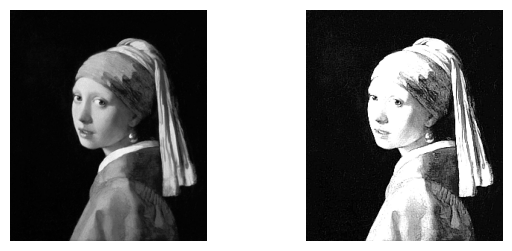

In [86]:
from PIL import Image
import numpy as np
 
# Read image
img = Image.open('/content/moccca7a-com-brinco-pecc81rola.webp')
new_size = ( int(img.size[0] // 3), int(img.size[1] // 3) )
img = img.resize( new_size, Image.ANTIALIAS)

# Converte a imagem para escala de cinza
image_gray = img.convert("L")

# Converte a imagem para uma matriz NumPy
image_array = np.array(image_gray)

kernel3 = np.array([[-1/2, 0, -1/2],
                   [ 0,   4,    0],
                   [-1/2, 0, -1/2]])

width, height = image_gray.size

image_array_conv = np.zeros((image_array.shape[0]-2,image_array.shape[1]-2))

for kernel in [kernel3]:
  # Aplica a convolução para cada pixel da imagem
  for x in range(1, height-1):
      for y in range(1, width-1):
          # Obtém os valores dos pixels vizinhos
          neighbors = np.array([ image_array[x-1, y-1], image_array[x, y-1], image_array[x+1, y-1] ,
                                image_array[x-1, y], image_array[x, y], image_array[x+1, y] ,
                                image_array[x-1, y+1], image_array[x, y+1], image_array[x+1, y+1] ])

          image_array_conv[x-1,y-1] = neighbors @ kernel.reshape(-1)

  # image_array_conv = np.ones((image_array.shape[0]-2,image_array.shape[1]-2))*255 - image_array_conv # negativos

  image_conv = Image.fromarray(image_array_conv)

  plt.figure(figsize=(7,3))
  plt.subplot(1,2,1)
  plt.imshow(image_gray,cmap='gray')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(image_conv)
  plt.axis('off')

plt.show()


In [31]:
CONTENT = """Otimize o seguinte código em Python:

from PIL import Image
import numpy as np
 
# Read image
img = Image.open('/content/moccca7a-com-brinco-pecc81rola.webp')
new_size = ( int(img.size[0] // 3), int(img.size[1] // 3) )
img = img.resize( new_size, Image.ANTIALIAS)

# Converte a imagem para escala de cinza
image_gray = img.convert("L")

# Converte a imagem para uma matriz NumPy
image_array = np.array(image_gray)

kernel3 = np.array([[-1/2, 0, -1/2],
                   [ 0,   4,    0],
                   [-1/2, 0, -1/2]])

width, height = image_gray.size

image_array_conv = np.zeros((image_array.shape[0]-2,image_array.shape[1]-2))

for kernel in [kernel3]:
  # Aplica a convolução para cada pixel da imagem
  for x in range(1, height-1):
      for y in range(1, width-1):
          # Obtém os valores dos pixels vizinhos
          neighbors = np.array([ image_array[x-1, y-1], image_array[x, y-1], image_array[x+1, y-1] ,
                                image_array[x-1, y], image_array[x, y], image_array[x+1, y] ,
                                image_array[x-1, y+1], image_array[x, y+1], image_array[x+1, y+1] ])

          image_array_conv[x-1,y-1] = neighbors @ kernel.reshape(-1)

  # image_array_conv = np.ones((image_array.shape[0]-2,image_array.shape[1]-2))*255 - image_array_conv # negativos

  image_conv = Image.fromarray(image_array_conv)

  plt.figure(figsize=(7,3))
  plt.subplot(1,2,1)
  plt.imshow(image_gray,cmap='gray')
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(image_conv)
  plt.axis('off')

plt.show()

"""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)


from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
 
# Read image
img = Image.open('/content/moccca7a-com-brinco-pecc81rola.webp')
new_size = ( img.size[0] // 3, img.size[1] // 3 )
img = img.resize( new_size, Image.ANTIALIAS)

# Convert image to grayscale and NumPy array
image_array = np.array(img.convert("L"))

# Define kernel
kernel3 = np.array([[-1/2, 0, -1/2],
                   [ 0,   4,    0],
                   [-1/2, 0, -1/2]])

# Apply convolution for each pixel of the image
image_array_conv = np.zeros((image_array.shape[0]-2,image_array.shape[1]-2))

for x in range(1, image_array.shape[0]-1):
    for y in range(1, image_array.shape[1]-1):
        # Obtain neighboring pixel values
        neighbors = image_array[x-1:x+2, y-1:y+2]
        # Compute convolution
        image_array_conv[x-1,y-1] = np.sum(neighbors * kernel3)

# Create output image from the NumPy array
image_conv = Image.fromarray(image_array_conv.astype(np.uint8))

# Display images using Mat

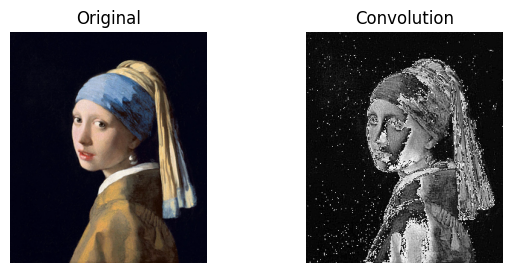

In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
 
# Read image
img = Image.open('/content/moccca7a-com-brinco-pecc81rola.webp')
new_size = ( img.size[0] // 3, img.size[1] // 3 )
img = img.resize( new_size, Image.ANTIALIAS)

# Convert image to grayscale and NumPy array
image_array = np.array(img.convert("L"))

# Define kernel
kernel3 = np.array([[-1/2, 0, -1/2],
                   [ 0,   4,    0],
                   [-1/2, 0, -1/2]])

# Apply convolution for each pixel of the image
image_array_conv = np.zeros((image_array.shape[0]-2,image_array.shape[1]-2))

for x in range(1, image_array.shape[0]-1):
    for y in range(1, image_array.shape[1]-1):
        # Obtain neighboring pixel values
        neighbors = image_array[x-1:x+2, y-1:y+2]
        # Compute convolution
        image_array_conv[x-1,y-1] = np.sum(neighbors * kernel3)

# Create output image from the NumPy array
image_conv = Image.fromarray(image_array_conv.astype(np.uint8))

# Display images using Matplotlib
fig, ax = plt.subplots(1,2, figsize=(7,3))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(image_conv, cmap='gray')
ax[1].set_title('Convolution')
ax[1].axis('off')
plt.show()

In [45]:
CONTENT = """Considere um exame onde a nota média é 70 e o desvio padrão 2.5.
Forneça o código Python para calcular a nota de corte que exclui os 25% 
piores alunos. 
"""
response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

Para calcular a nota de corte que exclui os 25% piores alunos, podemos utilizar a função `scipy.stats.norm.ppf`, que retorna o valor crítico z para uma distribuição normal padrão, dado o percentil desejado. Em seguida, podemos aplicar a fórmula `corte = media - z * desvio_padrao` para obter a nota de corte.

Segue o código Python para calcular a nota de corte:

```python
from scipy.stats import norm

media = 70
desvio_padrao = 2.5
percentil = 0.25

z = norm.ppf(percentil) # calcula o valor crítico z para o percentil
corte = media - z * desvio_padrao # aplica a fórmula para obter a nota de corte

print(f"A nota de corte que exclui os {percentil * 100:.0f}% piores alunos é {corte:.2f}.")
```

Nesse exemplo, a nota de corte seria de aproximadamente 64.81, ou seja, apenas os 75% melhores alunos receberiam nota igual ou superior a esse valor.


In [48]:
from scipy.stats import norm

media = 70
desvio_padrao = 2.5
percentil = 0.25

z = norm.ppf(percentil) # calcula o valor crítico z para o percentil
corte = media - z * desvio_padrao # aplica a fórmula para obter a nota de corte

print(f"A nota de corte que exclui os {percentil * 100:.0f}% piores alunos é {corte:.2f}.")

A nota de corte que exclui os 25% piores alunos é 71.69.


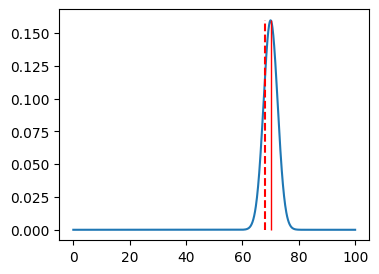

In [60]:
plt.figure(figsize=(4,3))
sns.lineplot(x=np.linspace(0,100,1000),
             y=norm.pdf(np.linspace(0,100,1000),loc=70,scale=2.5))
plt.vlines(70,0,0.16,lw=1,color='r')
plt.vlines(68,0,0.16,color='r',linestyle='--')
plt.show()

In [54]:
norm.ppf(0.25,loc=70,scale=2.5)

68.3137756245098

# Automação de Python

In [87]:
CONTENT = """Crie um DataFrame do valor Diário de Ações da Bolsa com os seguintes atributos:

Nome do Ativo,
Data,
Valor_Abertura,
Valor_Fechamento

Popule com 20 dados fictícios.
"""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

import pandas as pd

data = {'Nome do Ativo': ['PETR4', 'VALE3', 'ITUB4', 'BBDC4', 'B3SA3', 
                          'BTOW3', 'CSNA3', 'GGBR4', 'VVAR3', 'AZUL4', 
                          'CVCB3', 'CNTO3', 'GOLL4', 'NATU3', 'MRFG3', 
                          'ELET3', 'EQTL3', 'SULA11', 'BBAS3', 'BRFS3'],
        'Data': ['01/01/2021', '02/01/2021', '03/01/2021', '04/01/2021', '05/01/2021',
                 '06/01/2021', '07/01/2021', '08/01/2021', '09/01/2021', '10/01/2021',
                 '11/01/2021', '12/01/2021', '13/01/2021', '14/01/2021', '15/01/2021',
                 '16/01/2021', '17/01/2021', '18/01/2021', '19/01/2021', '20/01/2021'],
        'Valor_Abertura': [29.35, 83.52, 24.80, 25.15, 58.53, 
                           64.78, 23.12, 20.54, 17.89, 31.75, 
                           14.87, 87.36, 20.07, 50.78, 17.52, 
                           3.58, 22.66, 45.20, 40.21, 7.46],
        'Valor_Fechamento': [30.52, 84.25, 25.02, 25.44, 58.79, 
                          

## Empregando diretamente a saída

In [ ]:
import pandas as pd
import numpy as np

# Criando a lista com os dados fictícios
ativos = ['PETR4', 'VALE3', 'BBAS3', 'ITSA4', 'BBDC4', 'ITUB4', 'B3SA3', 'ABEV3', 'VVAR3', 'JBSS3', 'GOAU4', 'IRBR3', 'ELET3', 'GOLL4', 'RENT3', 'USIM5', 'COGN3', 'LCAM3', 'CSNA3', 'AZUL4']
datas = pd.date_range(start='2022-01-01', end='2022-01-20', freq='D')
valores_abertura = np.random.uniform(low=20, high=100, size=20).round(2)
valores_fechamento = np.random.uniform(low=20, high=100, size=20).round(2)

# Criando o DataFrame
df = pd.DataFrame({'Nome do Ativo': ativos,
                   'Data': datas,
                   'Valor_Abertura': valores_abertura,
                   'Valor_Fechamento': valores_fechamento})

# Visualizando as primeiras linhas do DataFrame
df.head()

,Nome do Ativo,Data,Valor_Abertura,Valor_Fechamento
0,PETR4,2022-01-01,41.96,69.70
1,VALE3,2022-01-02,78.27,29.25
2,BBAS3,2022-01-03,86.24,64.38
3,ITSA4,2022-01-04,60.05,44.13
4,BBDC4,2022-01-05,46.31,77.81


## Empregando a saída como entrada para um programa

In [ ]:
del df

In [88]:
exec( response.choices[0].message.content )
df.head()

   Nome do Ativo        Data  Valor_Abertura  Valor_Fechamento
0          PETR4  01/01/2021           29.35             30.52
1          VALE3  02/01/2021           83.52             84.25
2          ITUB4  03/01/2021           24.80             25.02
3          BBDC4  04/01/2021           25.15             25.44
4          B3SA3  05/01/2021           58.53             58.79
5          BTOW3  06/01/2021           64.78             63.72
6          CSNA3  07/01/2021           23.12             24.77
7          GGBR4  08/01/2021           20.54             20.33
8          VVAR3  09/01/2021           17.89             18.17
9          AZUL4  10/01/2021           31.75             30.12
10         CVCB3  11/01/2021           14.87             14.20
11         CNTO3  12/01/2021           87.36             88.52
12         GOLL4  13/01/2021           20.07             20.63
13         NATU3  14/01/2021           50.78             50.13
14         MRFG3  15/01/2021           17.52           

,Nome do Ativo,Data,Valor_Abertura,Valor_Fechamento
0,PETR4,01/01/2021,29.35,30.52
1,VALE3,02/01/2021,83.52,84.25
2,ITUB4,03/01/2021,24.80,25.02
3,BBDC4,04/01/2021,25.15,25.44
4,B3SA3,05/01/2021,58.53,58.79


In [ ]:
CONTENT = """Forneça o código para, no DataFrame anterior,
retornar os valores médios de Valor_Abertura e Valor_Fechamento diários."""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

Para retornar os valores médios de Valor_Abertura e Valor_Fechamento diários no DataFrame anterior, basta usar o método `groupby` do Pandas para agrupar os valores por Data e, em seguida, aplicar o método `mean` para calcular as médias dos valores de cada grupo. O código ficaria assim:

```python
df.groupby('Data')[['Valor_Abertura', 'Valor_Fechamento']].mean()
```

O resultado será um novo DataFrame com as médias diárias de cada uma das colunas selecionadas.


## Empregando diretamente a saída

In [ ]:
df.groupby('Data')[['Valor_Abertura', 'Valor_Fechamento']].mean()

,Valor_Abertura,Valor_Fechamento
Data,,
2022-01-01,97.31,96.61
2022-01-02,36.53,86.89
2022-01-03,26.20,99.33
2022-01-04,96.88,62.66
2022-01-05,95.00,39.31
2022-01-06,34.92,32.15
2022-01-07,60.65,93.69
2022-01-08,28.05,53.89
2022-01-09,60.62,27.36


In [ ]:
CONTENT = """Forneça o código para, no DataFrame anterior,
para criar um gráfico da evolução dos valores médios diários de Valor_Abertura e Valor_Fechamento."""

response = openai.ChatCompletion.create(
  model=MODEL,
  messages=[
    {"role": "user", "content": CONTENT}
  ]
  )

print(response.choices[0].message.content)

Supondo que o DataFrame se chame "dados", o código seria:

```python
import matplotlib.pyplot as plt

# calcular os valores médios diários de Valor_Abertura e Valor_Fechamento
media_abertura = dados.groupby('Data')['Valor_Abertura'].mean()
media_fechamento = dados.groupby('Data')['Valor_Fechamento'].mean()

# criar um gráfico de linhas com os valores médios diários
plt.plot(media_abertura.index, media_abertura.values, label='Abertura')
plt.plot(media_fechamento.index, media_fechamento.values, label='Fechamento')

# adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Valor médio')
plt.title('Evolução dos valores médios diários de Abertura e Fechamento')

# exibir o gráfico
plt.show()
```

Neste código, usamos o método `groupby()` para agrupar os dados pelo campo "Data" e calcular o valor médio de "Valor_Abertura" e "Valor_Fechamento" para cada dia. Depois, criamos um gráfico de linhas com os valores médios diários. Por fim, adicionamos legendas e título ao gráfico e 

## Empregando diretamente a saída

Aqui, tive de fazer um pequeno ajuste no código, trocando `dados` por `df`. Ainda ajustei ao tamanho da figura. 

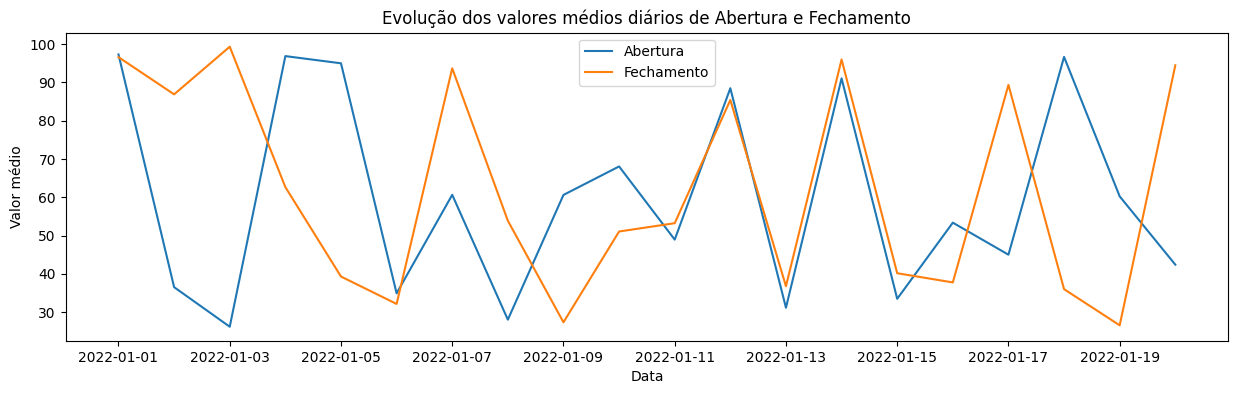

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
# calcular os valores médios diários de Valor_Abertura e Valor_Fechamento
media_abertura = df.groupby('Data')['Valor_Abertura'].mean()
media_fechamento = df.groupby('Data')['Valor_Fechamento'].mean()

# criar um gráfico de linhas com os valores médios diários
plt.plot(media_abertura.index, media_abertura.values, label='Abertura')
plt.plot(media_fechamento.index, media_fechamento.values, label='Fechamento')

# adicionar legendas e título
plt.legend()
plt.xlabel('Data')
plt.ylabel('Valor médio')
plt.title('Evolução dos valores médios diários de Abertura e Fechamento')

# exibir o gráfico
plt.show()

# Langchain

In [89]:
!pip install langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
import pandas as pd

In [92]:
import os

os.environ['OPENAI_API_KEY'] = openai.api_key



## **CASE European Energy** 

<br>

<img src="https://camo.githubusercontent.com/a1a0f0c83b5fce8c06f95188889bf5bc4e63939541930179f8c0c5b406fb9ae1/68747470733a2f2f696d616765732e756e73706c6173682e636f6d2f70686f746f2d313533323630313232343437362d3135633739663266376135313f69786c69623d72622d312e322e3126697869643d65794a6863484266615751694f6a45794d446439266175746f3d666f726d6174266669743d63726f7026773d3133353026713d3830" width=300, align="left">




In [90]:
df = pd.read_csv('https://github.com/Rogerio-mack/Analise_de_dados_labs/raw/main/data/energy_types.csv') 
df.head()

,country,country_name,type,level,2016,2017,2018
0,BE,Belgium,Conventional thermal,Level 1,30728.0,31316.0,30092.635
1,BE,Belgium,Nuclear,Level 1,41430.0,40128.5,26995.628
2,BE,Belgium,Hydro,Level 1,1476.0,1360.9,1239.248
3,BE,Belgium,Pumped hydro power,Level 2,1110.0,1093.2,983.190
4,BE,Belgium,Wind,Level 1,5340.0,6387.9,7177.346


In [93]:
pd_agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)

In [94]:
pd_agent.run('Qual o percentual de energia eólica produzida em 2018?')



> Entering new AgentExecutor chain...
Thought: I need to calculate the percentage of wind energy produced in 2018
Action: python_repl_ast
Action Input: df[df['type'] == 'Wind']['2018'].sum() / df['2018'].sum()
Observation: 0.10595745918122858
Thought: I now know the final answer
Final Answer: 10.6%

> Finished chain.


'10.6%'

In [95]:
df[df['type'] == 'Wind']['2018'].sum() / df['2018'].sum()

0.10595745918122858

In [96]:
pd_agent.run('Qual país apresenta maior produção de energia nuclear?')



> Entering new AgentExecutor chain...
Thought: Preciso comparar os valores de produção de energia nuclear de cada país
Action: python_repl_ast
Action Input: df[df['type'] == 'Nuclear'].groupby('country_name')['2018'].max()
Observation: country_name
Albania                      0.000
Austria                      0.000
Belgium                  26995.628
Bosnia & Herzegovina         0.000
Bulgaria                 15290.000
Croatia                      0.000
Cyprus                       0.000
Czechia                  28255.421
Denmark                      0.000
Estonia                      0.000
Finland                  21890.000
France                  393153.254
Georgia                      0.000
Germany                  72274.133
Greece                       0.000
Hungary                  14854.662
Ireland                      0.000
Italy                        0.000
Latvia                       0.000
Lithuania                    0.000
Luxembourg                   0.000
Malta         

'A França tem a maior produção de energia nuclear.'

In [ ]:
df[df['type'] == 'Nuclear'].groupby('country_name')['2018'].sum().sort_values(ascending=False).head(5)

country_name
France     393153.254
Ukraine     84397.900
Germany     72274.133
Sweden      65801.155
Spain       53270.800
Name: 2018, dtype: float64

In [97]:
pd_agent.run('Faça um teste de hipótese para verificar se a produção de energia eólica produzida é de fato significativamente diferente entre os anos 2017 e 2018?')



> Entering new AgentExecutor chain...
Thought: Eu preciso verificar se há diferença significativa entre os valores de 2017 e 2018 para a produção de energia eólica.
Action: python_repl_ast
Action Input: df[df['type'] == 'Wind'][['2017', '2018']].describe()
Observation:                 2017           2018
count      37.000000      37.000000
mean    10269.284324   10846.821081
std     19821.832518   21420.874413
min         0.000000       0.000000
25%       148.523000     162.000000
50%      1504.063000    1350.356000
75%     12112.464000   12487.345000
max    103707.000000  112174.000000
Thought: Agora eu posso verificar se há diferença significativa entre os valores de 2017 e 2018 para a produção de energia eólica.
Action: python_repl_ast
Action Input: from scipy.stats import ttest_ind
Observation: 
Thought: Agora eu posso usar o ttest_ind para verificar se há diferença significativa entre os valores de 2017 e 2018 para a produção de energia eólica.
Action: python_repl_ast
Action Inp

'Não, não há diferença significativa entre os valores de 2017 e 2018 para a produção de energia eólica, pois o valor-p é maior que 0,05.'

In [26]:
content = '''Faça um gráfico mostrando para o ano de 2018 a proporção de produção
            de energia com fontes renováveis e não renováveis para cada um dos 5
            maiores países produtores de energia'''

pd_agent.run(content)



> Entering new AgentExecutor chain...
Thought: I need to find the 5 largest countries in terms of energy production in 2018
Action: python_repl_ast
Action Input: df.sort_values(by='2018', ascending=False).head(5)
Observation:     country country_name                  type    level        2016  \
73       FR       France               Nuclear  Level 1  384008.125   
32       DE      Germany  Conventional thermal  Level 1  390141.000   
264      TR       Turkey  Conventional thermal  Level 1  174166.000   
88       IT        Italy  Conventional thermal  Level 1  190121.000   
216      UK          NaN  Conventional thermal  Level 1  203165.188   

           2017        2018  
73   379093.955  393153.254  
32   376128.000  320437.701  
264  199910.043  195153.546  
88   199722.444  185046.000  
216  189296.528  180837.905  
Thought: I need to find the total energy production for each of these countries in 2018
Action: python_repl_ast
Action Input: df[df['country'].isin(['FR', 'DE', 'TR'

 I need to find the total energy production from renewable sources for each of these countries in 2018
Action: python_repl_ast
Action Input: df[(df['country'].isin(['FR', 'DE', 'TR', 'IT', 'UK'])) & (df['type'].str.contains('Renewable'))].groupby('country')['2018'].sum()
Observation: Series([], Name: 2018, dtype: float64)
Thought: I need to find the total energy production from non-renewable sources for each of these countries in 2018
Action: python_repl_ast
Action Input: df[(df['country'].isin(['FR', 'DE', 'TR', 'IT', 'UK'])) & (~df['type'].str.contains('Renewable'))].groupby('country')['2018'].sum()
Observation: country
DE    578460.796
FR    560767.871
IT    281866.000
TR    289282.578
UK    319891.625
Name: 2018, dtype: float64
Thought: I now know the total energy production from renewable and non-renewable sources for each of the 5 countries
Final Answer: A plot showing the proportion of energy production from renewable and non-renewable sources for each of the 5 largest countries

'A plot showing the proportion of energy production from renewable and non-renewable sources for each of the 5 largest countries in 2018.'